    UM PANORAMA DO CENÁRIO DE INADIMPLÊNCIA DAS FAMILIAS BRASILEIRAS EM 2021, ASSOCIADOS ÀS VARIÁVEIS RENDA E DESEMPREGO.



A Pesquisa de Endividamento e Inadimplência do Consumidor (PEIC), relata que em 2021, houve um aumento recorde onde, mais de 70,9 % das famílias brasileiras estariam endividadas. Inicialmente é necessário identificar os motivos e possíveis fatores que levam ao endividamento, assim como compreender as caracteristicas socioeconômicas das variáveis demográficas, o perfil das empresas e de seus clientes, e como as taxas de desemprego desdobram-se em efeitos no sistema financeiro, num contexto macro econômico.
Os índices de Endividamento e Inadimplência dos consumidores tornam-se cada vez mais altos no Brasil. A identificação dos possíveis fatores tornou-se um parâmetro necessário para que as empresas tracem um planejamento estratégico facilitado e orientado. O objetivo deste trabalho é demonstrar através da análise em dados públicos de pesquisas descritivas, a relação entre a renda, desemprego, endividamento e inadimplência utilizando a linguagem Python. Com a implementação de análise temporal, os resultados indicam que as variáveis de forma isolada não possuem capacidade decisiva, mas podem proporcionar oportunidades de discursões e adequações para um planejamento a longo prazo, condicionando às expectativas e objetivos da organização.

DADOS DE DESEMPREGO E RENDA

A Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD), realizada pelo Instituto Brasileiro de Geografia e Estatística (IBGE) apresenta informações contínuas com características demográficas sobre a população brasileira no mercado de trabalho, e o desenvolvimento socioeconômico do Brasil. A pesquisa é elaborada por amostragem probabilística, trimestralmente, num esquema de rotação da amostra adotada nomeado de 1-2(5), onde o domicílio é entrevistado 1 mês e sai da amostra por 2 meses seguidos, sendo esta sequência repetida 5 vezes, as manutenções destes dados são feitas por um banco de dados agregados chamado SIDRABrasil, abrangendo 20 Regiões Metropolitanas e Municípios das Capitais brasileiras(IBGE).

DADOS ENDIVIDAMENTO

Os dados foram obtidos da Pesquisa de Endividamento e Inadimplência do Consumidor (PEIC), apurado mensalmente pela CNC desde janeiro de 2010, e coleta dados de 18.000 consumidores em todas as capitais do Brasil. Tem por objetivo apurar importantes indicadores como: ní¬vel de endividamento, percentual de inadimplentes, possíveis fatores que impulsionaram a divida, nível de comprometimento da renda entre outros e ainda, no sentido de  monitoramento do endividamento do consumidor

EXTRAÇÃO DE DADOS

Sabendo que foram utilizadas bases de dados diferentes, teremos três ficheiros para a análise: Rendimento.xls, tx_desocupacao.xls, endividamentobra.xls, arquivos renomeados e as colunas reordenadas ( coluna transformada em linha, e linha em coluna) para fácil manipulação, pois constam na base de dados como download automático. Assim, foi feita a programação no Jupyter notebook.

In [5]:
#Importação as bibliotecas necessárias.

import pandas as pd # Analise e manipulação das planilhas
import numpy as np #realizar cálculos em Arrays, ou seja , dados de forma ordenada
import matplotlib.pyplot as plt #criação de gráficos em 2D 
import seaborn as sns 
import locale
import datetime

In [6]:
#Importando padrão Português pois o Python trabalha com dados em Inglês
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

In [7]:
#Conferindo localização
locale.getlocale()

('pt_BR', 'UTF-8')

In [8]:
#Importação da base de Dados da variável TAXA DE DESEMPREGO. 

tx_desocupacao = pd.read_excel('C:/Users/Fabiola/OneDrive/Documentos/MTI/Artigo/Dados/tx_desocupacao.xls')

In [9]:
#Visualização do Dataframe

tx_desocupacao.head()

,Datas,Indices
0,jan-fev-mar 2012,8.0
1,fev-mar-abr 2012,7.8
2,mar-abr-mai 2012,7.7
3,abr-mai-jun 2012,7.6
4,mai-jun-jul 2012,7.5


In [12]:
# Visualização as strings em lista para realizar a padronização das datas para análise.

print(tx_desocupacao['Datas'].to_list())

['jan-fev-mar 2012', 'fev-mar-abr 2012', 'mar-abr-mai 2012', 'abr-mai-jun 2012', 'mai-jun-jul 2012', 'jun-jul-ago 2012', 'jul-ago-set 2012', 'ago-set-out 2012', 'set-out-nov 2012', 'out-nov-dez 2012', 'nov-dez-jan 2013', 'dez-jan-fev 2013', 'jan-fev-mar 2013', 'fev-mar-abr 2013', 'mar-abr-mai 2013', 'abr-mai-jun 2013', 'mai-jun-jul 2013', 'jun-jul-ago 2013', 'jul-ago-set 2013', 'ago-set-out 2013', 'set-out-nov 2013', 'out-nov-dez 2013', 'nov-dez-jan 2014', 'dez-jan-fev 2014', 'jan-fev-mar 2014', 'fev-mar-abr 2014', 'mar-abr-mai 2014', 'abr-mai-jun 2014', 'mai-jun-jul 2014', 'jun-jul-ago 2014', 'jul-ago-set 2014', 'ago-set-out 2014', 'set-out-nov 2014', 'out-nov-dez 2014', 'nov-dez-jan 2015', 'dez-jan-fev 2015', 'jan-fev-mar 2015', 'fev-mar-abr 2015', 'mar-abr-mai 2015', 'abr-mai-jun 2015', 'mai-jun-jul 2015', 'jun-jul-ago 2015', 'jul-ago-set 2015', 'ago-set-out 2015', 'set-out-nov 2015', 'out-nov-dez 2015', 'nov-dez-jan 2016', 'dez-jan-fev 2016', 'jan-fev-mar 2016', 'fev-mar-abr 2016',

In [13]:
#Foi necessário visualizar mais informações dos dados quanto ao tipo e nome das colunas.
tx_desocupacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Datas    117 non-null    object 
 1   Indices  117 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [14]:
#O formato das datas está em string selecionando um periodo de três meses , para melhor visualização fatianos a string.
#Deixamos somente o ano para padronização.

tx_desocupacao['Datas'] = tx_desocupacao['Datas'].apply(lambda x: x[12:16])

# Como haviam vários períodos de analises , agrupamos por ano e calculamos a média.

tx_desocupacao = tx_desocupacao.groupby(['Datas']).mean().reset_index()

print(tx_desocupacao)

  Datas    Indices
0  2012   7.380000
1  2013   7.300000
2  2014   6.875000
3  2015   8.425000
4  2016  11.383333
5  2017  12.875000
6  2018  12.383333
7  2019  12.058333
8  2020  13.500000
9  2021  13.709091


In [16]:
#renomeamos colunas e indexar no nome pelo inplace

tx_desocupacao.rename(columns={'Indices':'Desemprego'},inplace = True)

In [10]:
#Visualizando dados dos indices em lista.

print(tx_desocupacao['Desemprego'].to_list())

[7.38, 7.3, 6.875, 8.424999999999999, 11.383333333333333, 12.875, 12.383333333333333, 12.058333333333332, 13.5, 13.70909090909091]


DESEMPREGO - ANÁLISE

A média dos indices de desemprego aumentam gradativamente na ultima década.

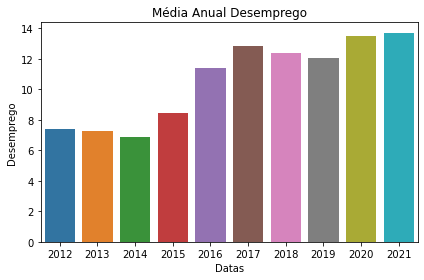

In [14]:
#Plotamos um gráfico de barras com a média de desemprego anual, nos Últimos anos.
#criando uma figure, axes
fig, ax = plt.subplots()

sns.barplot(x=tx_desocupacao.index, y=tx_desocupacao['Desemprego'], ax=ax, data=tx_desocupacao['Datas'])

plt.title('Média Anual Desemprego')

fig.tight_layout()

In [15]:
# Importação base de dados da VARIÁVEL Endividamento (Selecionamos somente a primeira aba que possui todos os dados).

Endividamento = pd.read_excel('C:/Users/Fabiola/OneDrive/Documentos/MTI/Artigo/Dados/EndividamentoBra.xls',sheet_name = "TodosResultados")

In [16]:
# Como foi uma Pesquisa amostral foi necessária a seleção somente dos percentuais totais  dos tópicos inerentes à investigação.

list(Endividamento.columns)

['Unnamed: 0',
 'Nível de Endividamento (% do total de famílias)',
 'Muito endividado',
 'Mais ou Menos endividado',
 'Pouco Endividado',
 'Não tem dívidas desse tipo',
 'Não sabe',
 'Não respondeu',
 'Familias Endividadas (% do total de famílias)',
 'Tipo de dívida (% do total de famílias)',
 'Cartão de crédito',
 'Cheque especial',
 'Cheque pré-datado',
 'Crédito consignado',
 'Crédito pessoal',
 'Carnês',
 'Financiamento de carro',
 'Financiamento de casa',
 'Outras dívidas',
 'Não sabe.1',
 'Não respondeu.1',
 'Famílias com conta em Atraso (% dos endividados)',
 'Sim',
 'Não',
 'Não sabe.2',
 'Não respondeu.2',
 'Familias com contas em Atraso (% do total de famílias)',
 'Condições de pagamento da dívida em atraso (% das famílias com contas em atraso)',
 'Sim, totalmente',
 'Sim, em parte',
 'Não terá condições de pagar',
 'Não sabe.3',
 'Não respondeu.3',
 'Não terão condição de pagar contas em atraso (% do total de famílias)',
 'Tempo de pagamento em atraso (Dentre as famílias com

In [86]:
# importando a base de dados novamente com as colunas especificas do Endividamento(somente primeira aba por possui todos os dados)

Endividamento = pd.read_excel('C:/Users/Fabiola/OneDrive/Documentos/MTI/Artigo/Dados/EndividamentoBra.xls',
                              sheet_name = "TodosResultados",
                              usecols = ['Unnamed: 0','Famílias endividadas .1', 
                                         'Famílias com conta em Atraso.1', 
                                         'Famílias que não terão condições de pagar as dívidas em atraso.1'])

In [87]:
# Visualização dos dados

Endividamento.head()

,Unnamed: 0,Famílias endividadas .1,Famílias com conta em Atraso.1,Famílias que não terão condições de pagar as dívidas em atraso.1
0,2010-01-01,8.964992e+06,4.405072e+06,1.456665e+06
1,2010-02-01,9.059222e+06,3.926985e+06,1.224179e+06
2,2010-03-01,9.190462e+06,4.163213e+06,1.262141e+06
3,2010-04-01,8.464659e+06,3.696875e+06,1.292983e+06
4,2010-05-01,8.578619e+06,3.856320e+06,1.293158e+06


In [88]:
#Renomear colunas e indexar o novos nomes.

Endividamento.rename(columns={'Unnamed: 0':'Datas', 'Famílias endividadas .1':'Famílias endividadas', 
                              'Famílias com conta em Atraso.1':'Famílias com conta em Atraso', 
                              'Famílias que não terão condições de pagar as dívidas em atraso.1':'Famílias que não terão condições de pagar as dívidas em atraso'}, inplace = True)

In [89]:
#Visualização com os novos nomes

Endividamento.head()

,Datas,Famílias endividadas,Famílias com conta em Atraso,Famílias que não terão condições de pagar as dívidas em atraso
0,2010-01-01,8.964992e+06,4.405072e+06,1.456665e+06
1,2010-02-01,9.059222e+06,3.926985e+06,1.224179e+06
2,2010-03-01,9.190462e+06,4.163213e+06,1.262141e+06
3,2010-04-01,8.464659e+06,3.696875e+06,1.292983e+06
4,2010-05-01,8.578619e+06,3.856320e+06,1.293158e+06


In [60]:
#Confirmação do tipo e outras informações sobre os dados.

Endividamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Datas                                                           144 non-null    datetime64[ns]
 1   Famílias endividadas                                            144 non-null    float64       
 2   Famílias com conta em Atraso                                    144 non-null    float64       
 3   Famílias que não terão condições de pagar as dívidas em atraso  144 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.6 KB


In [61]:
#O formato das datas está em datetime , porém possui vários meses de cada anao , para melhor visualização agrupamos por ano.

Endividamento['Ano'] = Endividamento['Datas'].map(lambda x: 1*x.year)

#Criamos um Dataframe com o Ano e as variaveis.
Endividamento = Endividamento.loc[:, ['Ano', 'Famílias endividadas','Famílias com conta em Atraso','Famílias que não terão condições de pagar as dívidas em atraso']]

# Agrupamos por ano, com as médias de todas as variáveis relacionadas ao endividamento.
Endividamento1 = Endividamento.groupby(['Ano']).mean().reset_index()

print(Endividamento1)


     Ano  Famílias endividadas  Famílias com conta em Atraso  \
0   2010          8.642616e+06                  3.766928e+06   
1   2011          9.090478e+06                  3.398160e+06   
2   2012          8.470610e+06                  3.039488e+06   
3   2013          9.109768e+06                  3.043350e+06   
4   2014          9.041244e+06                  2.836560e+06   
5   2015          8.921747e+06                  3.075872e+06   
6   2016          9.448241e+06                  3.723440e+06   
7   2017          9.681798e+06                  3.942647e+06   
8   2018          9.665659e+06                  3.787941e+06   
9   2019          1.028027e+07                  3.841278e+06   
10  2020          1.079092e+07                  4.140443e+06   
11  2021          1.155476e+07                  4.114597e+06   

    Famílias que não terão condições de pagar as dívidas em atraso  
0                                        1.288364e+06               
1                            

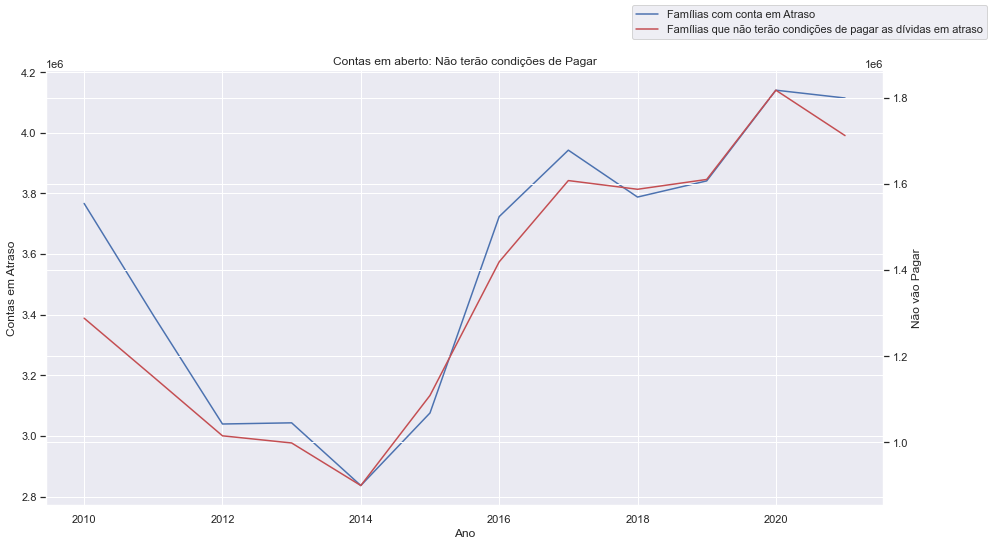

In [49]:
# Analisamos os resultados das variáveis para perceber se as pessoas que tem dividas é proporcional ao numero de
# pessoas que informaram não ter condições de pagar.

sns.set(rc={'figure.figsize':(15,8)})
ax = Endividamento1.plot(x="Ano", y="Famílias com conta em Atraso",ylabel='Contas em Atraso' ,legend=False)
ax2 = ax.twinx()
Endividamento1.plot(x="Ano", y="Famílias que não terão condições de pagar as dívidas em atraso", ylabel='Não vão Pagar',ax=ax2, legend = False , color="r")
ax.figure.legend()
plt.title('Contas em aberto: Não terão condições de Pagar')
plt.show()

Podemos observar que as duas variáveis são aparentemente proporcionais no período, porém visualizamos um ponto de atenção onde o total das famílias que alegaram não ter condição de pagar diminui consideravelmente enquanto as que têm contas em atraso permanece estável. isto justifica-se por fatores macroenomicos, que aparentemente está relacionado à pandemia. Porém, percebe-se nesta analise a importantancia de não analisar as duas variáveis isoladamente, pois existem outros fatores relacionados ao poder de pagamento e inadimplencia.

In [50]:
## Importação base de dados da VARIÁVEL Rendas.

Rendimento = pd.read_excel('C:/Users/Fabiola/OneDrive/Documentos/MTI/Artigo/Dados/Rendimento.xls')


In [51]:
#Visualizand os dados.
Rendimento.head()

,Datas,Renda
0,jan-fev-mar 2012,2492
1,fev-mar-abr 2012,2501
2,mar-abr-mai 2012,2494
3,abr-mai-jun 2012,2500
4,mai-jun-jul 2012,2513


In [52]:
#O formato das datas está em string selecionando um periodo de três meses , para melhor visualização fatiamos a strin,
# e deixamos somente o ano para padronização.

Rendimento['Datas'] = Rendimento['Datas'].apply(lambda x: x[12:16])

#Agrupamos por média anual.
Rendimento = Rendimento.groupby(['Datas']).mean().reset_index()

print(Rendimento)

  Datas        Renda
0  2012  2506.600000
1  2013  2573.250000
2  2014  2625.000000
3  2015  2602.750000
4  2016  2544.166667
5  2017  2584.500000
6  2018  2625.166667
7  2019  2640.166667
8  2020  2749.750000
9  2021  2601.454545


In [53]:
#Visualizando os novos dados.

Rendimento.head()

,Datas,Renda
0,2012,2506.600000
1,2013,2573.250000
2,2014,2625.000000
3,2015,2602.750000
4,2016,2544.166667


ANÁLISE EM CONJUNTO ESTATÍSTICAS DESCRITIVAS DAS DUAS FONTES DE DADOS




In [272]:
#ANALISES DOS ÍNDICES DE FORMA GERAL

#Criar um dicionario de series
D = {'Indices_Desemprego':pd.Series([8.0, 7.8, 7.7, 7.6, 7.5, 7.4, 7.1, 7.0, 6.8, 6.9, 7.3, 7.8, 8.1, 7.9, 7.7, 7.5, 7.4, 7.2, 7.0, 6.8, 6.6, 6.3, 6.5, 6.8, 7.2, 7.2, 7.1, 6.9, 7.0, 7.0, 6.9, 6.7, 6.6, 6.6, 6.9, 7.5, 8.0, 8.1, 8.3, 8.4, 8.7, 8.9, 9.0, 9.1, 9.1, 9.1, 9.6, 10.3, 11.1, 11.3, 11.3, 11.4, 11.7, 11.9, 11.9, 11.9, 12.0, 12.2, 12.7, 13.3, 13.9, 13.7, 13.4, 13.1, 12.9, 12.7, 12.5, 12.3, 12.1, 11.9, 12.3, 12.7, 13.2, 13.0, 12.8, 12.6, 12.4, 12.3, 12.0, 11.9, 11.7, 11.7, 12.2, 12.6, 12.8, 12.6, 12.4, 12.1, 12.0, 11.9, 11.9, 11.8, 11.3, 11.1, 11.4, 11.8, 12.4, 12.7, 13.1, 13.6, 14.1, 14.8, 14.9, 14.6, 14.4, 14.2, 14.5, 14.6, 14.9, 14.8, 14.7, 14.2, 13.7, 13.1, 12.6, 12.1, 11.6]),
   'Famílias_endividadas':pd.Series([8964991.6909989, 9059222.16074737, 9190461.52134513, 8464659.327236159, 8578619.06929778, 7892410.367229525, 8415376.304555025, 8635219.941735374, 8669272.071296155, 8566125.49353273, 8743015.688692387, 8532015.093938706, 8672612.56875457, 9527911.196857763, 9476521.942759765, 9157637.540050179, 9403097.559426479, 9356106.33337407, 9262684.765943587, 9112137.731509386, 8990575.633015322, 8949810.08580106, 8606803.241121994, 8569838.198378598, 8600865.869214261, 8401881.854084916, 8393390.329880727, 8259529.967707413, 8108906.902641939, 8325230.951534845, 8355861.055646938, 8658574.154347993, 8525475.897852425, 8596380.218996324, 8586139.15937846, 8835078.431144778, 8772321.108605133, 8950801.174789395, 8901198.916684218, 9155238.91104769, 9355039.384779308, 9177420.898554577, 9501705.172671149, 9199288.351217173, 8970864.678214232, 9066440.65139772, 9204758.275196068, 9062140.222953785, 9201722.724683816, 9135893.507572422, 8897427.693702905, 9069374.767655525, 9144186.024627617, 9133932.941503515, 9202689.58249538, 9301372.944243537, 9239575.566361457, 8822319.40202278, 8669351.090615304, 8677085.694228075, 8437268.67835527, 8477398.409662912, 8726142.170361202, 8991411.933491595, 9092600.768182835, 9027315.498613706, 9006309.214229643, 9124908.548806248, 9241099.465338346, 9063131.499866668, 8920023.788369497, 8953350.642884223, 9003638.227099631, 9605057.488664806, 9511753.992221927, 9653899.330352234, 9536293.037944531, 9415725.129267078, 9388106.530559706, 9477347.995624164, 9528434.336997313, 9477449.421955466, 9434743.629898053, 9346446.47082347, 9323408.90742853, 9334324.918526385, 9668525.456736851, 9870751.070568219, 9666569.808721405, 9466807.928512532, 9603625.101023223, 9744463.100487294, 9823043.216750901, 9860892.009249277, 9904145.0560654, 9915015.740132758, 9800509.034926774, 9788287.330311593, 9797186.004380772, 9637260.624910725, 9462764.485185705, 9396686.379349139, 9551757.413154675, 9723044.64471315, 9728093.619411025, 9743523.074708, 9712557.045069147, 9646237.485420313, 9696780.86058181, 9926567.840654807, 10076171.644009521, 10125614.058242189, 10237701.110777175, 10341689.96572751, 10356426.473013135, 10469896.437987158, 10516629.552871596, 10470484.372914584, 10531191.73573114, 10614071.717141071, 10593873.446400186, 10564190.137951573, 10737723.590590602, 10802862.822455496, 10769589.810825098, 10880760.595483962, 10952419.635754973, 10960547.692858784, 10909826.21441491, 10802823.863590283, 10731124.080969939, 10785302.061175823, 10823593.340453088, 10876205.531627392, 10978502.975759055, 11003118.06521, 11085759.422728736, 11349784.654701259, 11639164.476635346, 11890738.645244703, 12072439.355449589, 12169236.141793933, 12327454.103333425, 12441098.036757996]),
   'Renda':pd.Series([2492, 2501, 2494, 2500, 2513, 2521, 2516, 2513, 2511, 2505, 2515, 2530, 2545, 2551, 2552, 2573, 2590, 2608, 2608, 2616, 2606, 2585, 2583, 2607, 2637, 2635, 2630, 2616, 2611, 2630, 2639, 2649, 2631, 2632, 2636, 2631, 2632, 2626, 2614, 2621, 2603, 2591, 2590, 2580, 2561, 2548, 2556, 2540, 2552, 2539, 2548, 2521, 2523, 2545, 2542, 2547, 2552, 2565, 2574, 2582, 2597, 2585, 2582, 2572, 2573, 2569, 2582, 2591, 2603, 2604, 2614, 2624, 2623, 2631, 2632, 2628, 2618, 2629, 2618, 2621, 2624, 2640, 2656, 2665, 2654, 2640, 2622, 2622, 2616, 2627, 2626, 2646, 2658, 2650, 2656, 2658, 2680, 2709, 2754, 2797, 2830, 2826, 2828, 2786, 2757, 2716, 2709, 2686, 2694, 2661, 2659, 2619, 2595, 2559, 2514, 2476, 2444])}

#Criar a DataFrame
Analise = pd.DataFrame(D)
print (Analise.describe())

       Indices_Desemprego  Famílias_endividadas        Renda
count          117.000000          1.440000e+02   117.000000
mean            10.617094          9.558176e+06  2607.000000
std              2.714847          9.191446e+05    71.850299
min              6.300000          7.892410e+06  2444.000000
25%              7.700000          8.952713e+06  2556.000000
50%             11.700000          9.372106e+06  2611.000000
75%             12.700000          9.906863e+06  2635.000000
max             14.900000          1.244110e+07  2830.000000


In [ ]:
CRIAÇÃO DE UM DATAFRAME COM AS MÉDIAS ANUAIS DE CADA VARIÁVEL PARA CONCLUSÃO.

In [260]:
# Visualizando MÉDIA DE RENDA em lista.

print(Rendimento['Renda'].to_list())

[2506.6, 2573.25, 2625.0, 2602.75, 2544.1666666666665, 2584.5, 2625.1666666666665, 2640.1666666666665, 2749.75, 2601.4545454545455]


In [64]:
#Visualizando MÉDIA DE ENDIVIDAMENTO em lista.

print(Endividamento1['Famílias endividadas'].to_list())

[8642615.727550438, 9090478.066416064, 8470609.566035919, 9109768.145509204, 9041244.32830936, 8921746.718180178, 9448241.299284032, 9681797.69285023, 9665658.928461751, 10280268.814137641, 10790920.329372635, 11554757.895807877]


In [65]:
#Visualizando MÉDIA DE DESEMPREGO em lista.

print(tx_desocupacao['Desemprego'].to_list())

[7.38, 7.3, 6.875, 8.424999999999999, 11.383333333333333, 12.875, 12.383333333333333, 12.058333333333332, 13.5, 13.70909090909091]


In [74]:
#Criamos um dicionário acrescetado manualmente o rendimento médio de 2010 e 2011 pois não tinhamos na base de dados:
##2010 - Não havia a inda a pesquisa da PNAD Então utilizei a média de 2011 .
##2011 (Renda:2419.0 e 6.7)Fonte: https://censo2010.ibge.gov.br/noticias-censo.html?busca=1&id=1&idnoticia=2222&t=pnad-2011-crescimento-renda-foi-maior-classes-rendimento-mais-baixas&view=noticia

S = {'Indices_Desemprego':pd.Series([6.70, 6.70, 7.38, 7.3, 6.875, 8.424999999999999, 11.383333333333333, 12.875, 12.383333333333333, 12.058333333333332, 13.5, 13.70909090909091]),
   'Famílias_endividadas':pd.Series([8642615.727550438, 9090478.066416064, 8470609.566035919, 9109768.145509204, 9041244.32830936, 8921746.718180178, 9448241.299284032, 9681797.69285023, 9665658.928461751, 10280268.814137641, 10790920.329372635, 11554757.895807877]),
   'Renda':pd.Series([2419.0, 2419.0, 2506.6, 2573.25, 2625.0, 2602.75, 2544.1666666666665, 2584.5, 2625.1666666666665, 2640.1666666666665, 2749.75, 2601.4545454545455]),
    'Ano':pd.Series([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])}

#Criar a DataFrame
Analise2 = pd.DataFrame(S)
print (Analise2)

    Indices_Desemprego  Famílias_endividadas        Renda   Ano
0             6.700000          8.642616e+06  2419.000000  2010
1             6.700000          9.090478e+06  2419.000000  2011
2             7.380000          8.470610e+06  2506.600000  2012
3             7.300000          9.109768e+06  2573.250000  2013
4             6.875000          9.041244e+06  2625.000000  2014
5             8.425000          8.921747e+06  2602.750000  2015
6            11.383333          9.448241e+06  2544.166667  2016
7            12.875000          9.681798e+06  2584.500000  2017
8            12.383333          9.665659e+06  2625.166667  2018
9            12.058333          1.028027e+07  2640.166667  2019
10           13.500000          1.079092e+07  2749.750000  2020
11           13.709091          1.155476e+07  2601.454545  2021


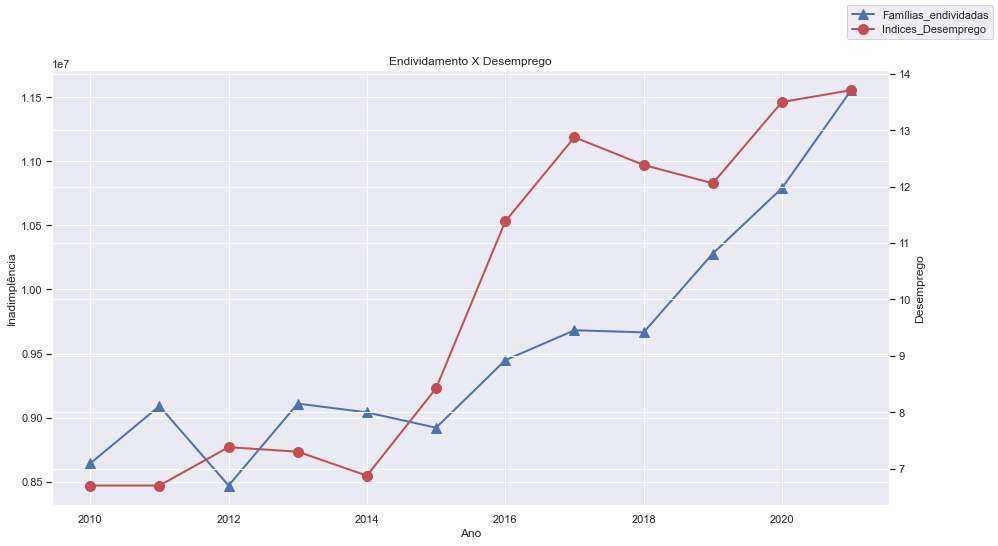

In [82]:
#Plotando as série

sns.set(rc={'figure.figsize':(15,8)})
ax = Analise2.plot(x="Ano", y="Famílias_endividadas",ylabel='Inadimplência' ,legend=False, ls = '-', lw = '2', marker = '^', ms = '10')
ax2 = ax.twinx()
Analise2.plot(x="Ano", y="Indices_Desemprego", ylabel='Desemprego',ax=ax2, legend = False , color="r", ls = '-', lw = '2', marker = 'o', ms = '10')
ax.figure.legend()
plt.title('Endividamento X Desemprego')
plt.show()

Verificamos que a medida média das familias endividadas foi expressivamente alta em 2021. Quando analisamos a média da renda nos últimos anos, não percebemos um aumento relevante que seja compatível ao aumento do consumo, e às altas taxas de desemprego.

<AxesSubplot:>

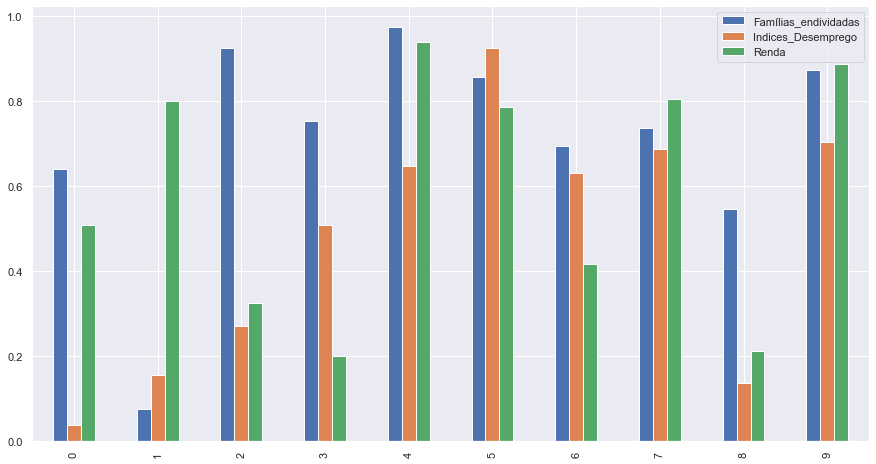

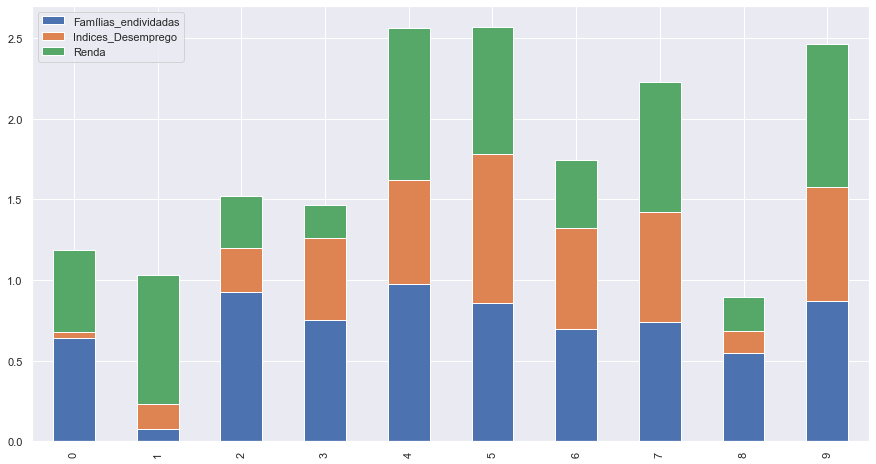

In [96]:
Analise2 = pd.DataFrame(np.random.rand(10,3),columns=['Famílias_endividadas', 'Indices_Desemprego', 'Renda'])
Analise2.plot.bar()
Analise2.plot.bar(stacked=True)

Os possíveis fatores onde o endividamento tem um maior potencial, podem ser analisados através de variáveis que determinam capacidade de endividamento dos consumidores. A análise da inadimplência de maneira macro econômica  proporciona oportunidades de discussão em relação a adequações de problemas preexistentes, informações sobre o nível de comprometimento da renda do consumidor com dívidas, contas em atraso, e sua percepção em relação à capacidade de pagamento.
A análise temporal, com dados a longo prazo, é uma importante aliada como ferramenta de análise de expectativas e objetivos. O desafio então é  possuir bases de dados compatíveis para realizar as análises entre si. 
A inadimplência em relação ao desemprego e renda seria mais precisa se considerássemos outras variáveis como sexo, idade, região etc.; Todas as variáveis de uma pesquisa por amostragem são necessárias para compreender as características e interpretá-las corretamente.
Entretanto, neste estudo é possivel visualisar que o comprometimento médio da renda entre as famílias com dívidas, é alto em relação ao seu endividamento. Uma parcela menor de consumidores relatou estar muito endividada e não ter condições de quitar suas dívidas.
Um possível fator que justifique a discrepância dos percetuais de endividamentos registrados em 2021, é o fato das famílias terem menor poder de renda, menos empregabilidade e mais dívidas em atraso.
